**EECS 4412 TASK 6**
(216771875-216328387-215122856)

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz #graphviz
import graphviz #graphviz
%matplotlib inline

table = pd.read_csv('216771875-216328387-215122856-T5Data.csv')
table.head()

,age,studytime,freetime,absences,G3
0,18,2,3,6,6
1,17,2,3,4,6
2,15,2,3,10,10
3,15,3,2,2,15
4,16,2,3,4,10


In [73]:
#Modifying Table to work with Classification, as data might not be sufficent for accurate regression predictions
rating = []
for row in table['G3']:
    if (0 <= row < 10):  rating.append('Failing')
    elif (10 <= row < 15):  rating.append('Passing')
    elif (15 <= row <= 20):  rating.append('Strongly_Passing')
        
table['rating'] = rating

cat_feat = ['age', 'absences', 'G3']
table.drop(cat_feat, axis=1, inplace=True)

table.head()

#Creating CSV File for this table
pd.DataFrame(table).to_csv("216771875-216328387-215122856-T6Data.csv")


In [74]:
#Setup for Decision Tree Classifer
#Marking data as feature or target
feature_cols = ['studytime', 'freetime'] # feature
x = table[feature_cols] 
y = table.rating # target

#Spliting data into training (70%) and test (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3) 

In [75]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

#Training
clf = clf.fit(x_train,y_train)

#Prediction
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666

Classification Report: 
                   precision    recall  f1-score   support

         Failing       1.00      0.50      0.67         2
         Passing       0.67      1.00      0.80         8
Strongly_Passing       0.50      0.20      0.29         5

        accuracy                           0.67        15
       macro avg       0.72      0.57      0.58        15
    weighted avg       0.66      0.67      0.61        15



In [76]:
#Generating Image of Decision Tree Classifier 
target = list(table['rating'].unique())
feature_names = list(table[feature_cols])

dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree_graph")

'decision_tree_graph.pdf'

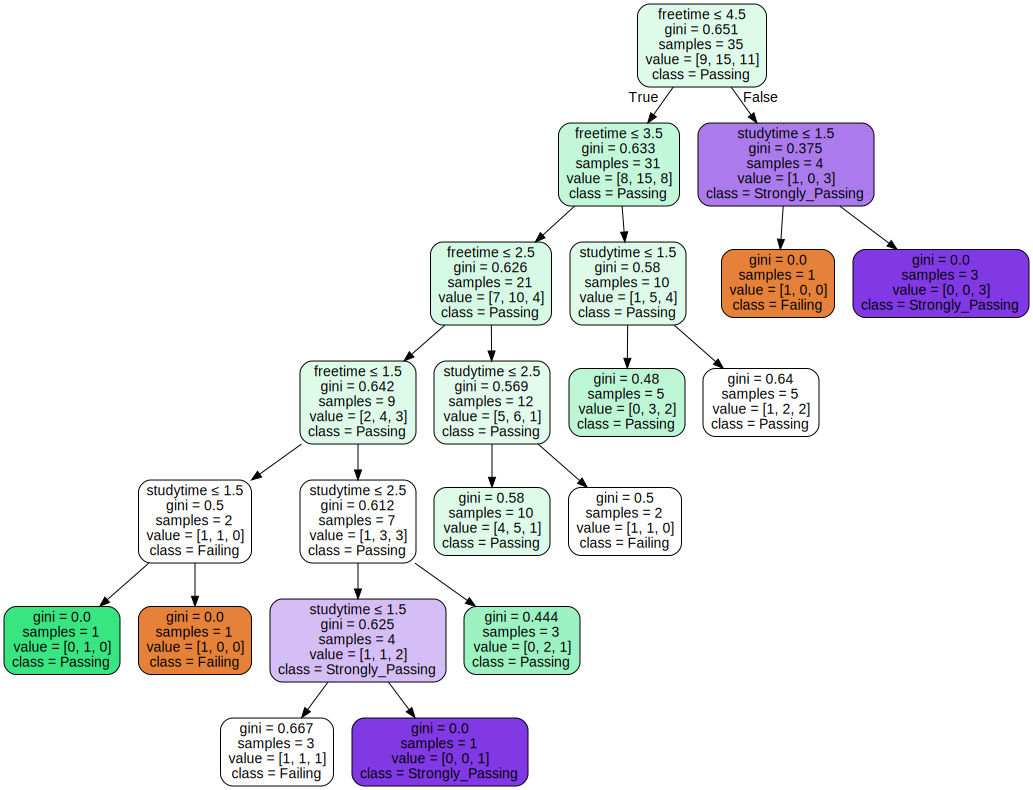

In [77]:
graph